# Data Description

This dataset contains features which determine the success of an ad campaign.

Here are what the columns represent:

* 'id' Unique id for each row

* 'ratings' Metric that represents how many people watched the advertisement

* 'airlocation' Country of origin

* 'airtime' Time when the advertisement was aired

* 'average_runtime(minutes_per_week)' Minutes per week the advertisement was aired

* 'targeted_sex' Sex that was mainly targeted for the advertisement

* 'genre' The genre of an advertisement

* 'industry' The industry to which the product belonged

* 'relationship_status' The relationship status of the most responsive customers to the advertisement

* 'expensive' A general measure of how expensive the product or service is that the ad is showing

* 'money_back_guarantee' Whether or not the product offers a refund in case of customer dissatisfaction

* 'netgain' (target) Whether the ad will incur a gain or loss

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv('Train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 26048 non-null  int64  
 1   realtionship_status                26048 non-null  object 
 2   industry                           26048 non-null  object 
 3   genre                              26048 non-null  object 
 4   targeted_sex                       26048 non-null  object 
 5   average_runtime(minutes_per_week)  26048 non-null  int64  
 6   airtime                            26048 non-null  object 
 7   airlocation                        26048 non-null  object 
 8   ratings                            26048 non-null  float64
 9   expensive                          26048 non-null  object 
 10  money_back_guarantee               26048 non-null  object 
 11  netgain                            26048 non-null  boo

In [4]:
df_train.isna().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [5]:
df_train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


# Exploratory Data Analysis

Let's change True and False into 1 and 0 in 'netgain' column.

In [12]:
df_train['netgain'] = df_train['netgain'].astype(int)

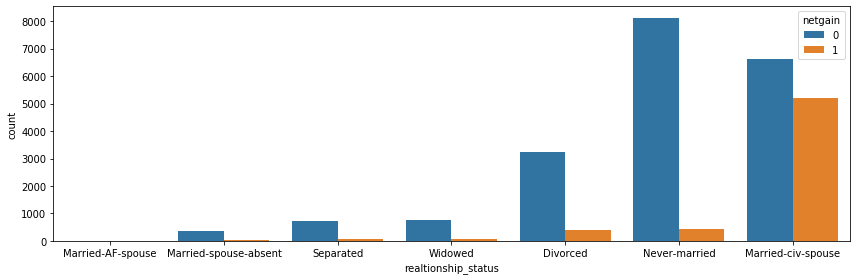

In [7]:
plt.figure(figsize=(12,4))
sns.countplot(x='realtionship_status',data=df_train,hue=df_train['netgain'],
              order=df_train['realtionship_status'].value_counts().sort_values().index)
plt.tight_layout()

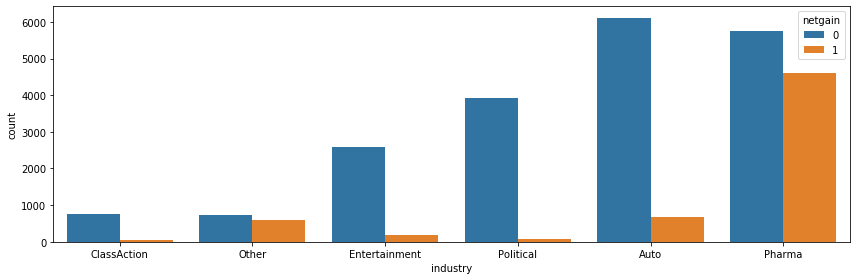

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(x='industry',data=df_train,hue=df_train['netgain'],
              order=df_train['industry'].value_counts().sort_values().index)
plt.tight_layout()

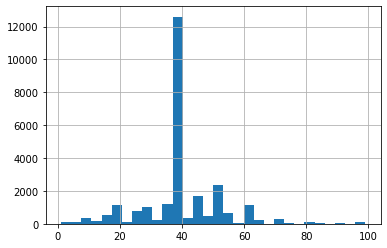

In [9]:
df_train['average_runtime(minutes_per_week)'].hist(bins=30)

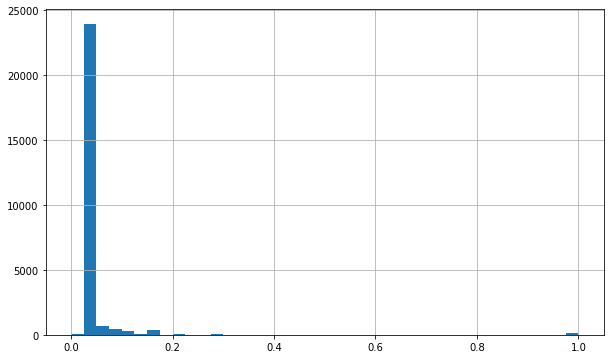

In [10]:
plt.figure(figsize=(10,6))
df_train['ratings'].hist(bins=40)

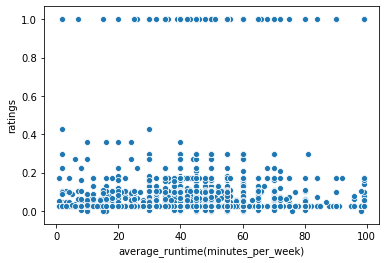

In [11]:
sns.scatterplot(x='average_runtime(minutes_per_week)',y='ratings',data=df_train)

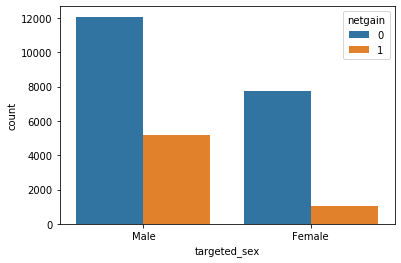

In [12]:
sns.countplot(x='targeted_sex',data=df_train,hue=df_train['netgain'])

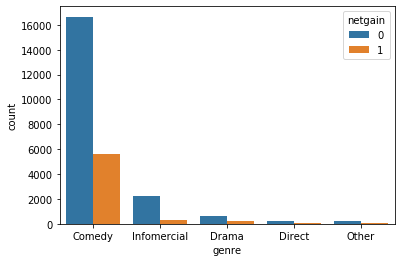

In [13]:
sns.countplot(x='genre',data=df_train,hue=df_train['netgain'])

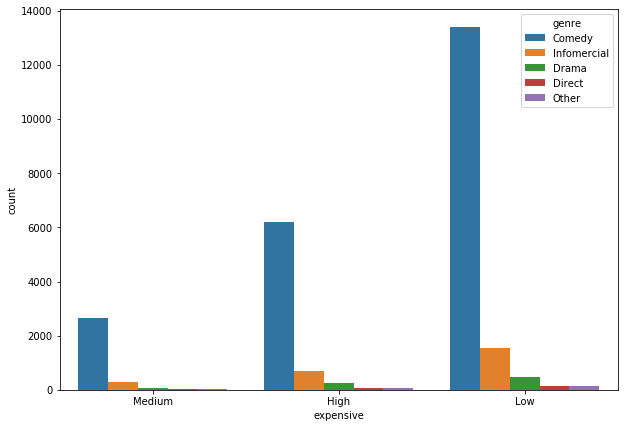

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x='expensive',hue='genre',data=df_train,order=df_train['expensive'].value_counts().sort_values().index)

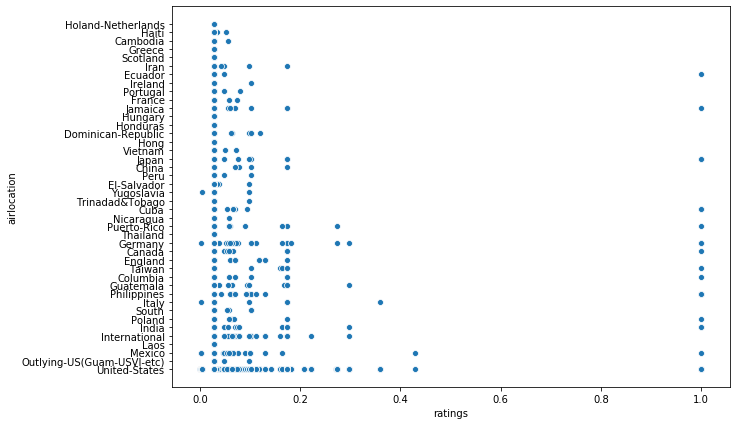

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='ratings',y='airlocation',data=df_train)

To transform qualitative features into quantitative ones, we will create dummy variables.

In [14]:
realtionship_status = pd.get_dummies(df_train['realtionship_status'],drop_first=True)
industry = pd.get_dummies(df_train['industry'],drop_first=True)
genre = pd.get_dummies(df_train['genre'],drop_first=True)
targeted_sex = pd.get_dummies(df_train['targeted_sex'],drop_first=True)
airlocation = pd.get_dummies(df_train['airlocation'],drop_first=True)
airtime = pd.get_dummies(df_train['airtime'],drop_first=True)
expensive = pd.get_dummies(df_train['expensive'],drop_first=True)
money_back_guarantee = pd.get_dummies(df_train['money_back_guarantee'],drop_first=True)

In [15]:
df_train.drop(['realtionship_status','industry','genre','targeted_sex','airtime', 'airlocation',
               'expensive','money_back_guarantee'],axis=1,inplace=True)

In [16]:
df_train = pd.concat([df_train,realtionship_status,industry,genre,targeted_sex,
                      airlocation,airtime,expensive,money_back_guarantee],axis=1)

# Building a Logistic Regression model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['netgain', 'id'],axis=1), 
                                                    df_train['netgain'], test_size=0.30, 
                                                    random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()

In [21]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions = logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print('Classification report:')
print(classification_report(y_test,predictions))
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      5962
           1       0.61      0.38      0.47      1853

    accuracy                           0.79      7815
   macro avg       0.72      0.65      0.67      7815
weighted avg       0.78      0.79      0.78      7815

Confusion matrix:
[[5505  457]
 [1147  706]]
